## **[Post Read] Advanced Augmentation Techniques**


#### **Agenda**
In this Lecture, we will be learning about various types of data augmentation techniques and their implementations in Python

#### Types of Data Augmentation

- **Spatial Transformation** : Using tranlation/rotation/resizing/scaling etc. the spatial position of the pixels are changed. This helps the network become robust to spatial changes. 
    1. Translation
    2. Rotation
    3. Flipping
    4. Shear
    5. Zoom
    6. Crop and Resize
- **Color Distortion** : Changing color properties like brightness, cotrast, saturation, hue etc is a good technique to make the network invariant to color shifts.
    1. Brightness
    2. Contrast
    3. Hue
    4. Saturation
    5. Color Jitter
    6. Color Degeneraton
- **Information Dropping** : Unlike other two modes of augmentation, which is used for simulating the real-world data, information deletion is a recent technique widely employed recently for increasing the robustness of the model.
    1. Cut Out
    2. Grid Mask
- **Mixed Sample Data Augmentation** : In Mixed Data Augmentation, we combine data samples (both images and labels) using policy like interpolation, masking etc. to create augmented dataset.
    1. MixUp
    2. CutMix
    3. FourierMix
- **Automatic Augmentation**: Another recent idea in this space which is highly effective and efficient. Here we first specify a set of augmentations to be applied, then the method will learn how to use these augmentations together on training data to yield a well-performing final classifier.
    1. Random Augmentation
    2. Trivial Augmentation

### Helper Functions to load and display sample

In [ ]:
# Install keras-cv library (https://github.com/keras-team/keras-cv) and update tensorflow
! pip install tensorflow -U # RESTART the Runtime if prompted to do so
! pip install keras-cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 5.9 MB 41.9 MB/s 
     |████████████████████████████████| 438 kB 57.5 MB/s 
     |████████████████████████████████| 1.7 MB 56.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Statements

import tensorflow as tf
from tensorflow import keras
import keras_cv
import tensorflow_datasets as tfds
tf.keras.utils.set_random_seed(111)

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Functions to Load and Visualize Samples
# Load Sample
def load_sample(output_size=(300, 300)):
    sample = keras.utils.get_file(
        "sample.jpg", 
        "https://t3638486.p.clickup-attachments.com/t3638486/a0a4f633-2963-4e06-acae-2ad1d12eba3e/sample.jpg",
    )
    sample = keras.utils.load_img(sample, target_size=output_size)
    sample = keras.utils.img_to_array(sample)
    return sample

# Visualize Sample
def show_images(imgs, num_rows, num_cols, scale=2):
    # show augmented images in a grid layout 
    aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1]
    figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            if num_rows != 1:
                axes[i][j].imshow(imgs[i * num_cols + j].numpy().astype("uint8"))
                axes[i][j].axes.get_xaxis().set_visible(False)
                axes[i][j].axes.get_yaxis().set_visible(False)
            else:
                plt.imsave('test.png', imgs[i * num_cols + j].numpy()[0].astype("uint8"))
                # print(imgs[i * num_cols + j].numpy()[0].astype("uint8"))
                axes[j].imshow(imgs[i * num_cols + j].numpy().astype("uint8"))
                axes[j].axes.get_xaxis().set_visible(False)
                axes[j].axes.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes

def apply(img, aug, num_rows=1, num_cols=4, scale=3):
    # apply augmentation multiple times to obtain different samples
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

#### 1. Spatial Transformation

a. Translation

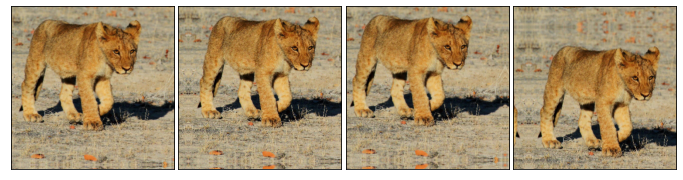

In [ ]:
from keras.layers import RandomTranslation

sample = load_sample(output_size=(300, 300))
aug_layer = RandomTranslation(
    height_factor = (-0.2, 0.3),
    width_factor = (-0.2, 0.3),
)

apply(sample, aug_layer)

b. Rotation        
        
`
tf.keras.layers.RandomRotation(
    factor,
    fill_mode='reflect',
    interpolation='bilinear',
    seed=None,
    fill_value=0.0,
    **kwargs
)
`

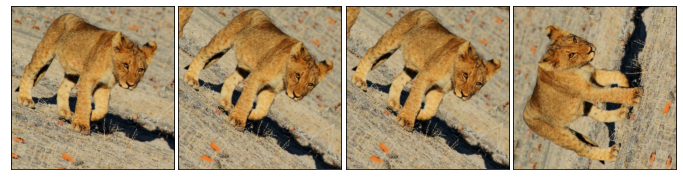

In [ ]:
from keras.layers import RandomRotation

sample = load_sample(output_size=(300, 300))
aug_layer = RandomRotation(
    factor = (-0.2, 0.3),
)

apply(sample, aug_layer)

c. Flipping    
    
`
tf.keras.layers.RandomFlip(
    mode=HORIZONTAL_AND_VERTICAL, seed=None, **kwargs
)
`

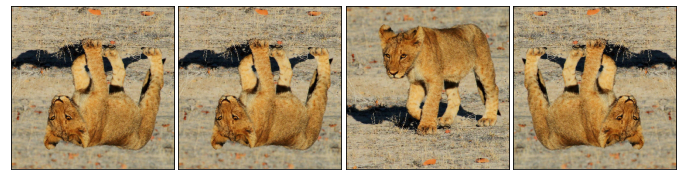

In [ ]:
from keras.layers import RandomFlip

sample = load_sample(output_size=(300, 300))
aug_layer = RandomFlip()

apply(sample, aug_layer)

d. Crop

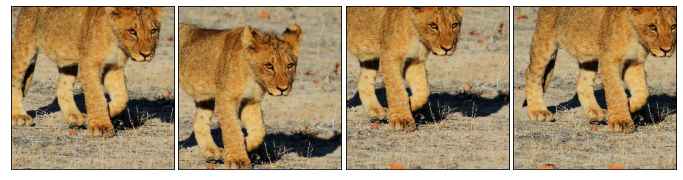

In [ ]:
from keras.layers import RandomCrop

sample = load_sample(output_size=(300, 300))
aug_layer = RandomCrop(
    height = 224,
    width = 224,
)

apply(sample, aug_layer)

e. Zoom

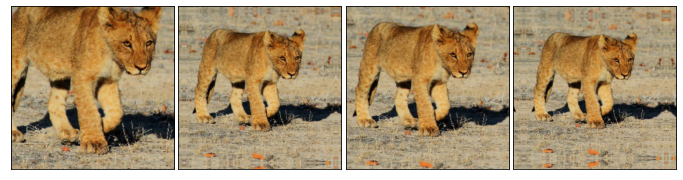

In [ ]:
from keras.layers import RandomZoom

sample = load_sample(output_size=(300, 300))
aug_layer = RandomZoom(
    # height_factor = (0.2, 0.5), # zoom-out
    height_factor = (-0.5, 0.2), # zoom-in
)

apply(sample, aug_layer)

f. Advanced Techniques like `RandomResizedCrop` and `RandomShear`

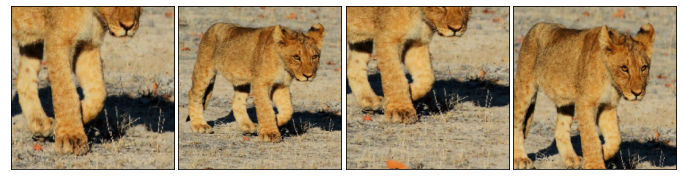

In [ ]:
from keras_cv.layers.preprocessing import RandomResizedCrop

sample = load_sample(output_size=(300, 300))
aug_layer = RandomResizedCrop(
    target_size=(224, 224),
    crop_area_factor=(0.08, 1.0),
    aspect_ratio_factor=(3.0 / 4.0, 4.0 / 3.0),
)
apply(sample, aug_layer, num_rows=1)

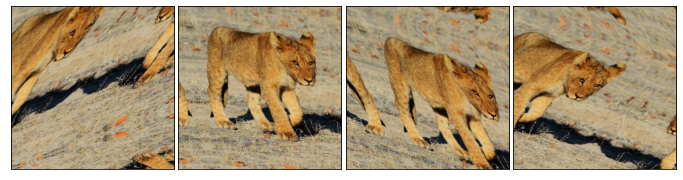

In [ ]:
from keras_cv.layers.preprocessing import RandomShear

sample = load_sample(output_size=(300, 300))
aug_layer = RandomShear(
    x_factor=(0, 1),
    y_factor=0.5,
)
apply(sample, aug_layer, num_rows=1)

#### 2. Color Distortion

a. Brightness

`tf.keras.layers.RandomBrightness(
    factor, value_range=(0, 255), seed=None, **kwargs
)
`

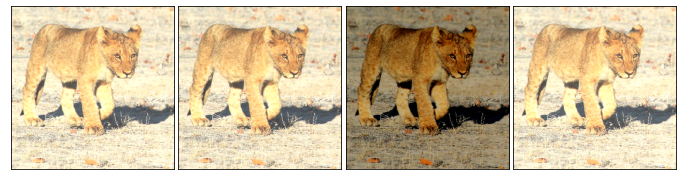

In [ ]:
from keras_cv.layers.preprocessing import RandomBrightness

sample = load_sample(output_size=(300, 300))
aug_layer = RandomBrightness(factor=(-0.2, 0.5))

apply(sample, aug_layer)

b. Contrast

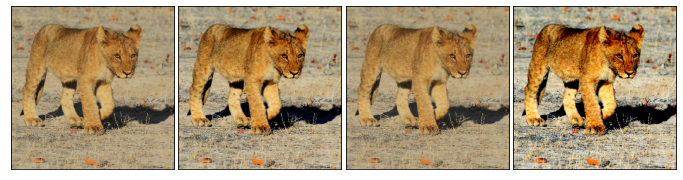

In [ ]:
from keras.layers import RandomContrast

sample = load_sample(output_size=(300, 300))
aug_layer = RandomContrast(factor=(0.5, 0.9))

apply(sample, aug_layer)

c. Hue

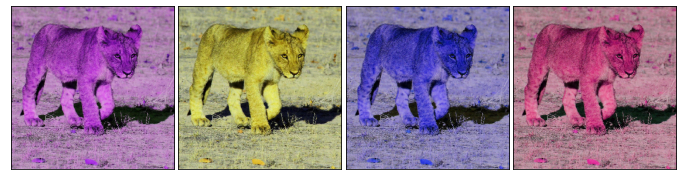

In [ ]:
from keras_cv.layers.preprocessing import RandomHue

sample = load_sample(output_size=(300, 300))
aug_layer = RandomHue(factor=(0.0, 1.0), value_range=(0, 255))

apply(sample, aug_layer)

d. Saturation

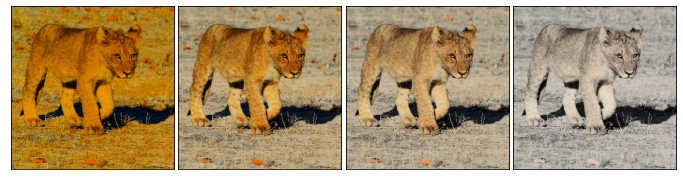

In [ ]:
from keras_cv.layers.preprocessing import RandomSaturation

sample = load_sample(output_size=(300, 300))
aug_layer = RandomSaturation(factor=(0.0, 1.0))

apply(sample, aug_layer)

e. Color Jitter

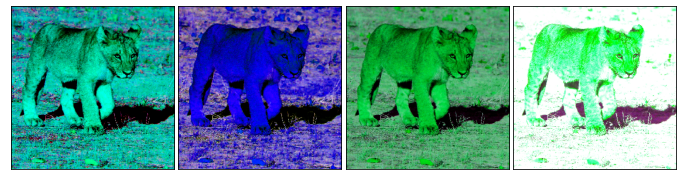

In [ ]:
from keras_cv.layers.preprocessing import RandomColorJitter

sample = load_sample(output_size=(300, 300))
aug_layer = RandomColorJitter(
    value_range=(0, 255),
    brightness_factor=(-0.2, 0.5),
    contrast_factor=(0.5, 0.9),
    saturation_factor=(0.5, 0.9),
    hue_factor=(0.5, 0.9),
    seed=101,
)

apply(sample, aug_layer)

#### 3. Information Dropping

a. Cut Out

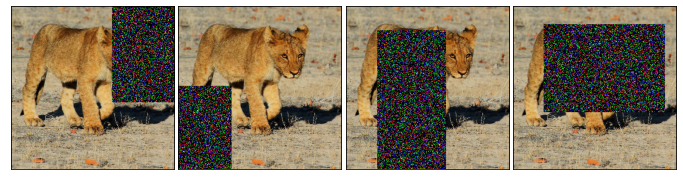

In [ ]:
from keras_cv.layers.preprocessing import RandomCutout

sample = load_sample(output_size=(300, 300))
aug_layer = RandomCutout(
    height_factor=(0.3, 0.9),
    width_factor=(0.3, 0.9),
    fill_mode="gaussian_noise",
)
apply(sample, aug_layer)

b. Grid Mask

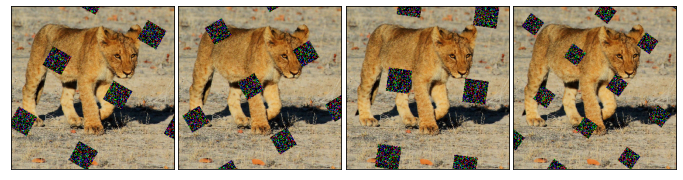

In [ ]:
from keras_cv.layers.preprocessing import GridMask
from keras_cv import ConstantFactorSampler

sample = load_sample(output_size=(300, 300))
aug_layer = GridMask(
    ratio_factor=ConstantFactorSampler(0.3),
    rotation_factor=0.5,
    fill_mode="gaussian_noise",
)
apply(sample, aug_layer)

#### 4. Mixed Sample Data Augmentation (MSDA)

Helper function to visualize MSDA


In [ ]:
def resize(image, label, img_size=(224, 224), classes=10):
    image = tf.image.resize(image, img_size)
    label = tf.one_hot(label, classes)
    return {"images": image, "labels": label}

def load_oxford_dataset(
    name="oxford_flowers102",
    batch_size=64,
    img_size=(224, 224),
    as_supervised=True,
):
    # Load dataset.
    data, ds_info = tfds.load(name, as_supervised=as_supervised, with_info=True)
    train_ds = data["train"]
    classes = ds_info.features["label"].num_classes

    # Get tf dataset.
    train_ds = train_ds.map(
        lambda x, y: resize(x, y, img_size=img_size, classes=classes)
    ).batch(batch_size)
    return train_ds

def visualize_dataset(ds):
    outputs = next(iter(ds.take(1)))
    images = outputs["images"]
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

a. MixUp

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteNU5MZ0/oxford_flowers102-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteNU5MZ0/oxford_flowers102-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteNU5MZ0/oxford_flowers102-validation.tfrecord…

Dataset oxford_flowers102 downloaded and prepared to ~/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


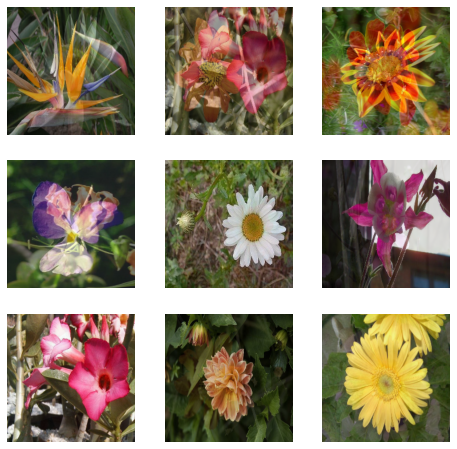

In [ ]:
from keras_cv.layers.preprocessing import MixUp

ds = load_oxford_dataset()
mixup = MixUp(alpha=0.8)
ds = ds.map(mixup, num_parallel_calls=tf.data.AUTOTUNE)
visualize_dataset(ds)

b. CutMix

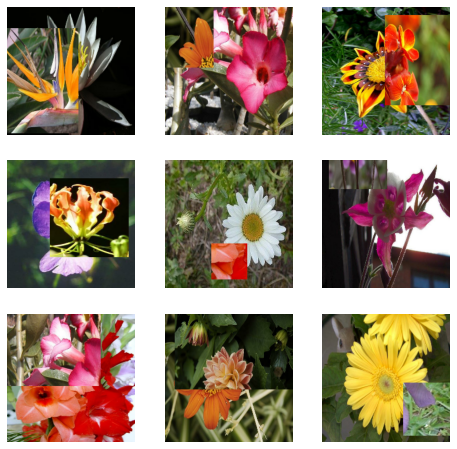

In [ ]:
from keras_cv.layers import CutMix

cutmix = CutMix()
ds = load_oxford_dataset()
ds = ds.map(cutmix, num_parallel_calls=tf.data.AUTOTUNE)
visualize_dataset(ds)

#### 4. Augmented Augmentation
        
a. Random Augmentation

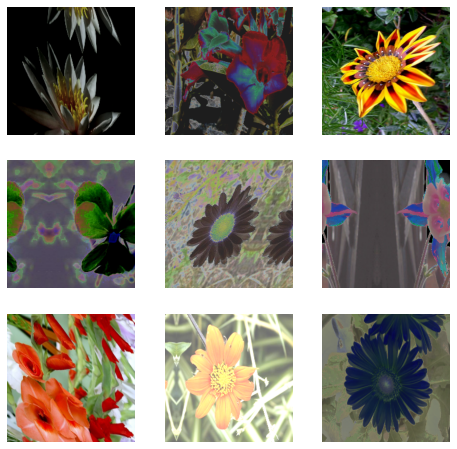

In [ ]:
from keras_cv.layers.preprocessing import RandAugment

ds = load_oxford_dataset()
rand_aug = RandAugment(
    value_range=(0, 255), augmentations_per_image=3, magnitude=0.5, rate=0.875
)
ds = ds.map(rand_aug, num_parallel_calls=tf.data.AUTOTUNE)
visualize_dataset(ds)